# Examen final
## Comparación de Kmeans Vs DBSCAN como algortimos clasificadores


Importación de Bibliotecas y Carga de Datos: Se importa la biblioteca `pandas` y se utiliza para cargar un archivo CSV llamado 'BankChurners.csv' en un DataFrame `data`.   


In [1]:
import pandas as pd
data = pd.read_csv('BankChurners.csv')

In [2]:
data.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Visualización de Histogramas

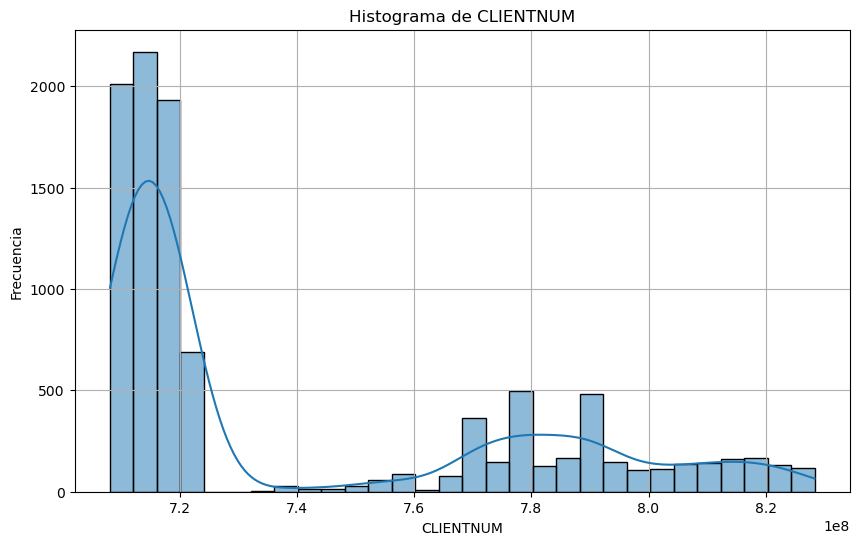

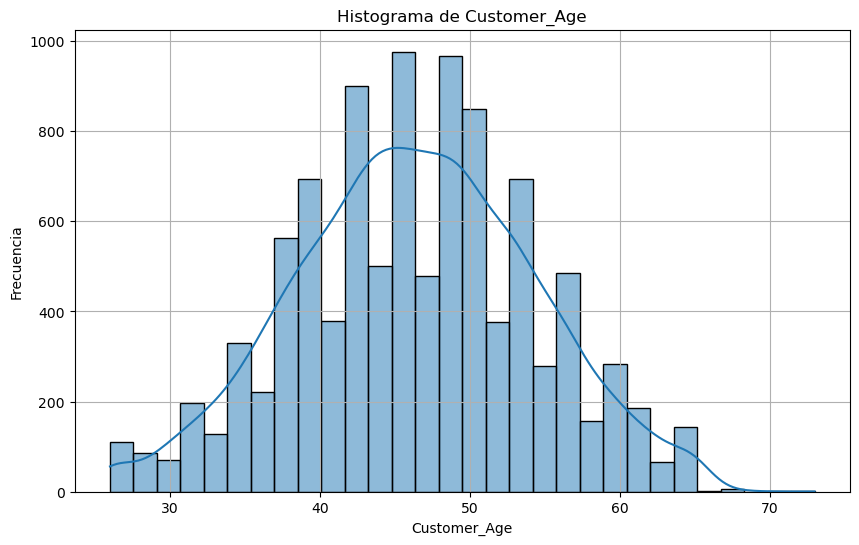

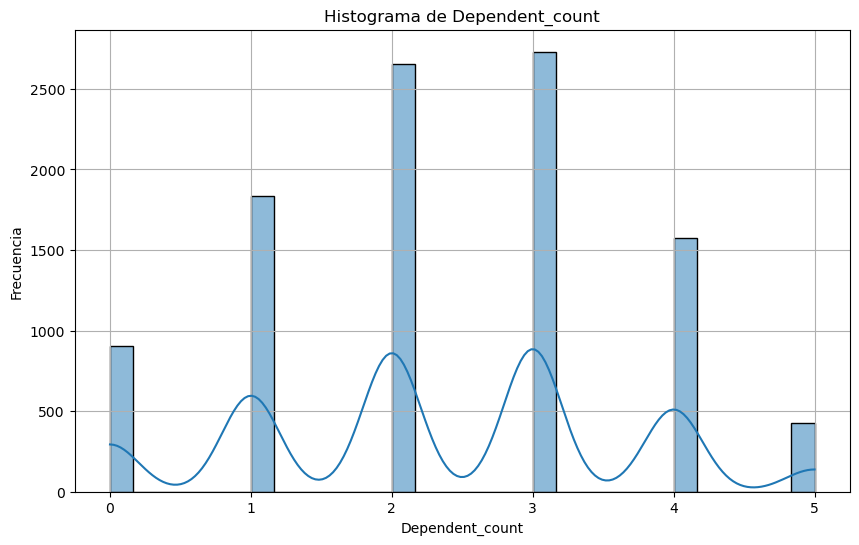

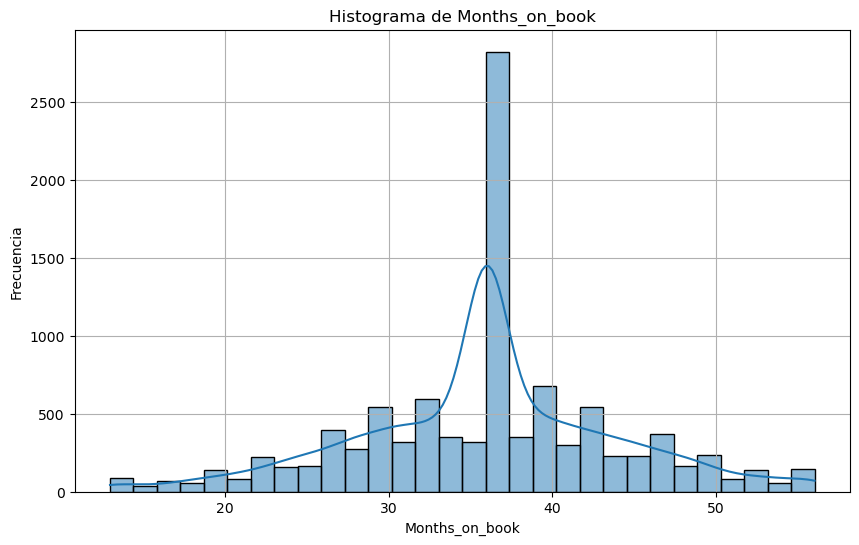

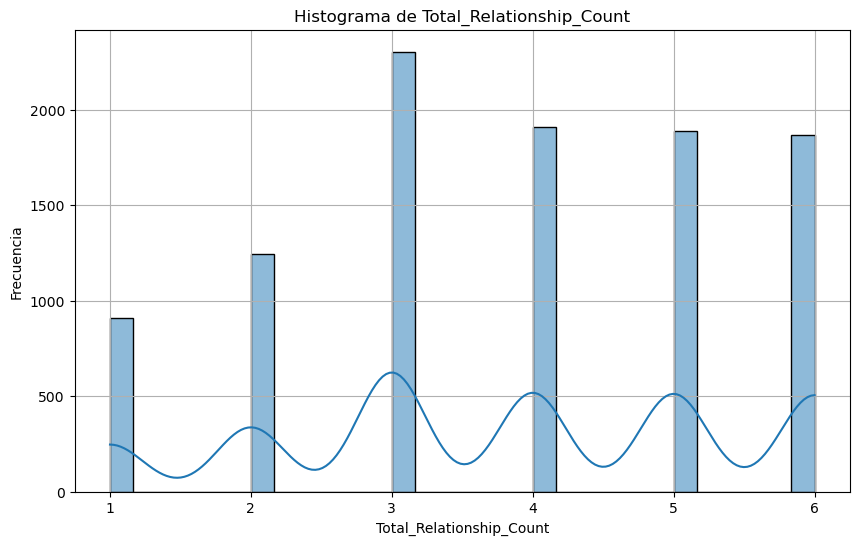

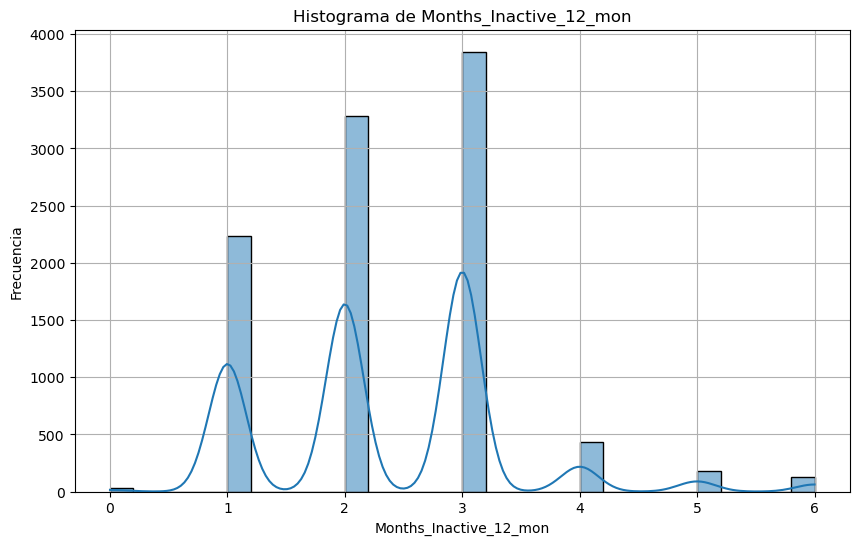

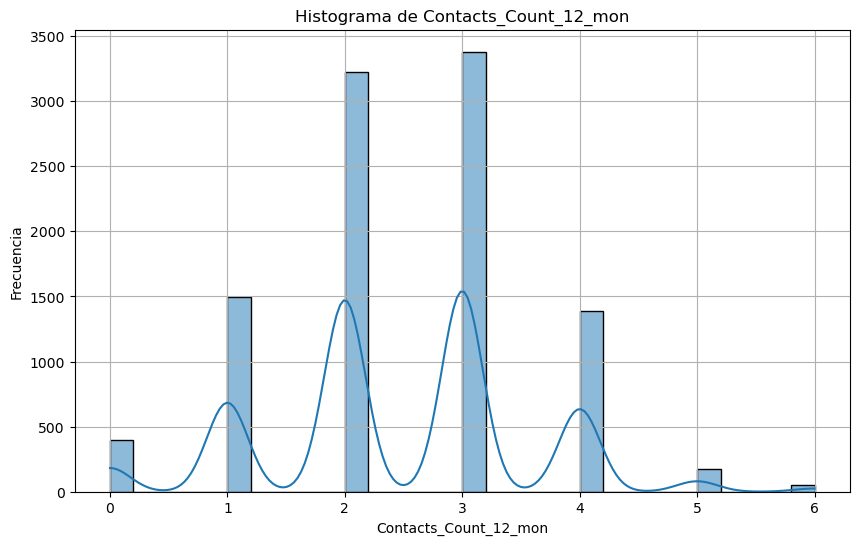

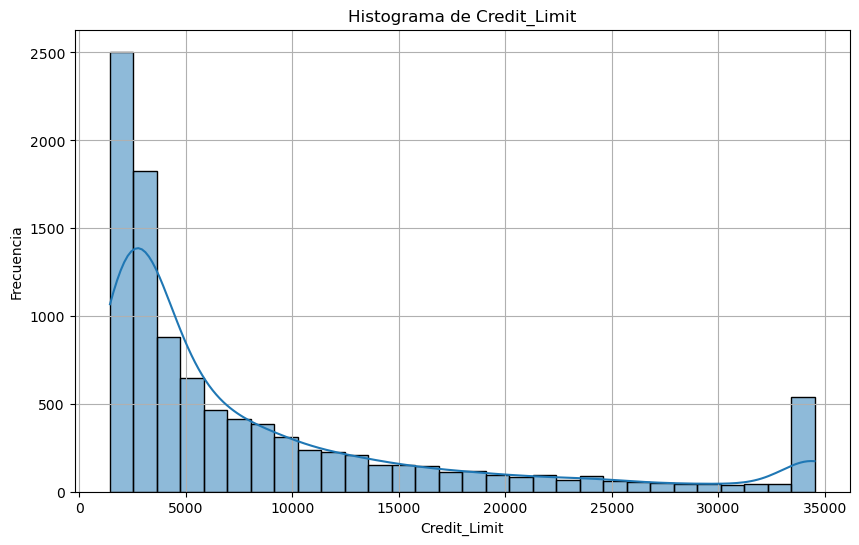

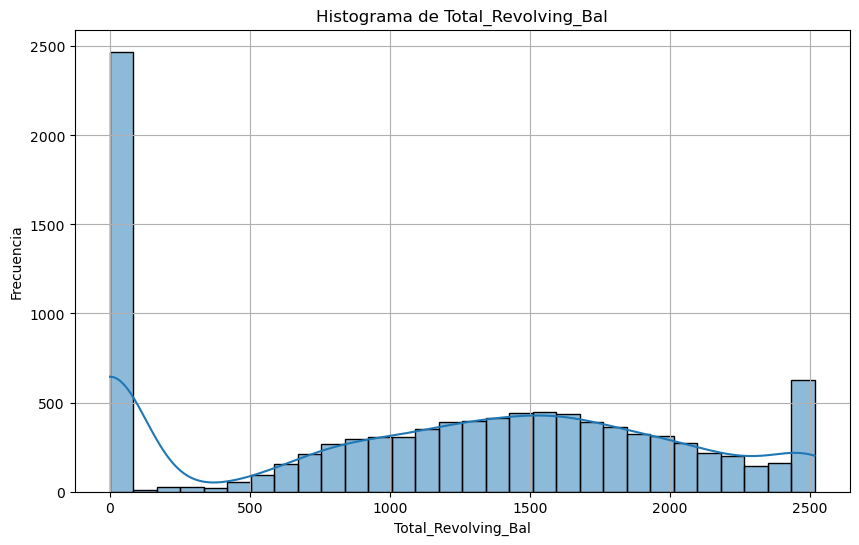

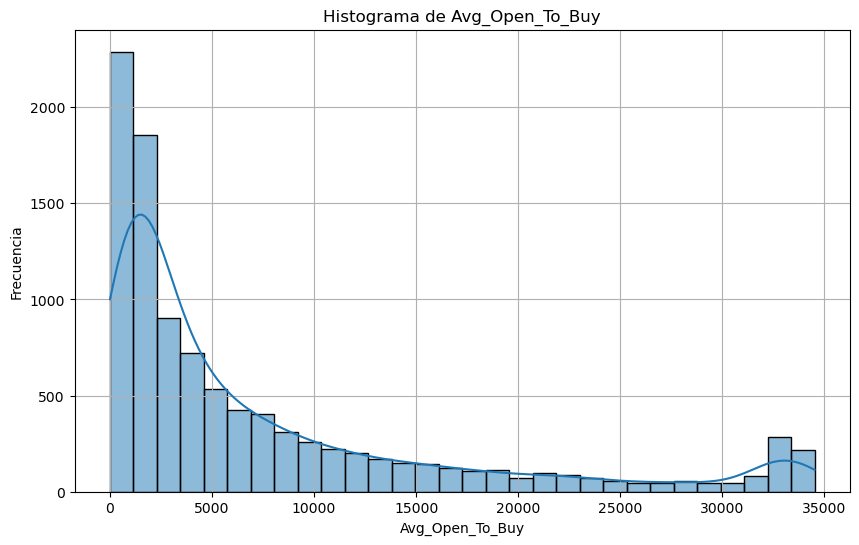

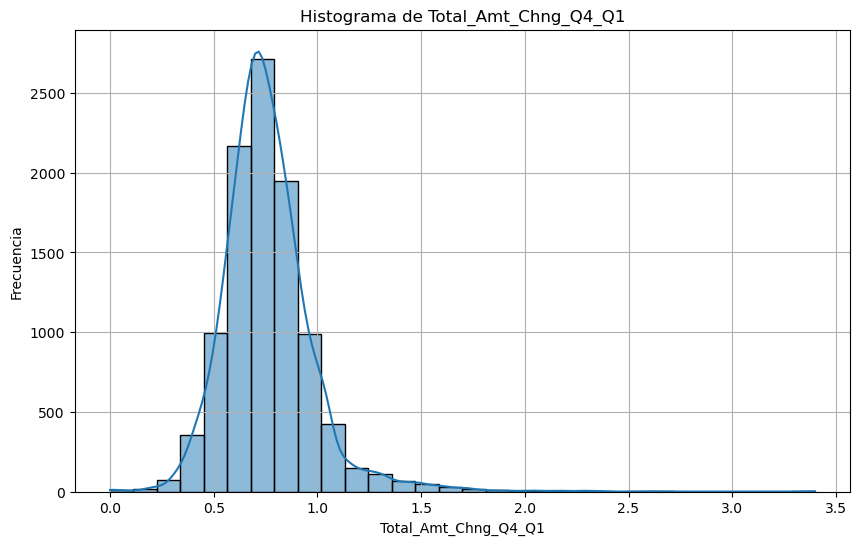

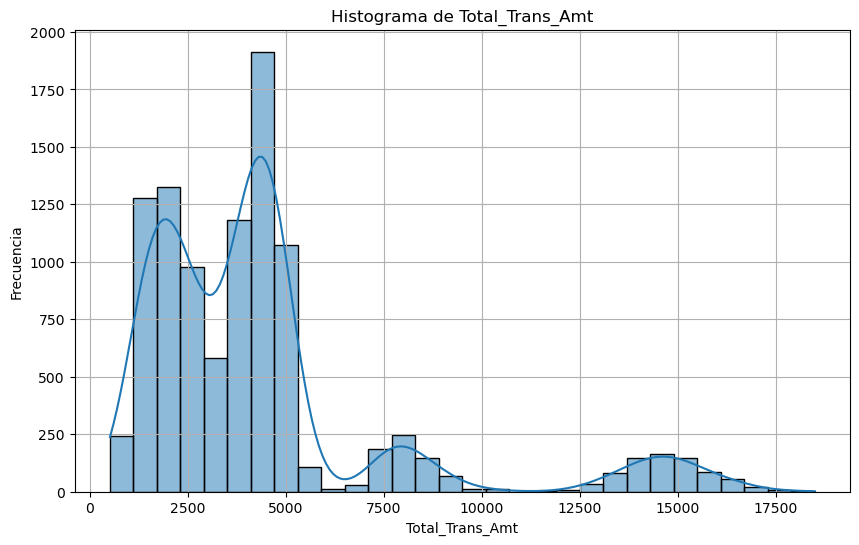

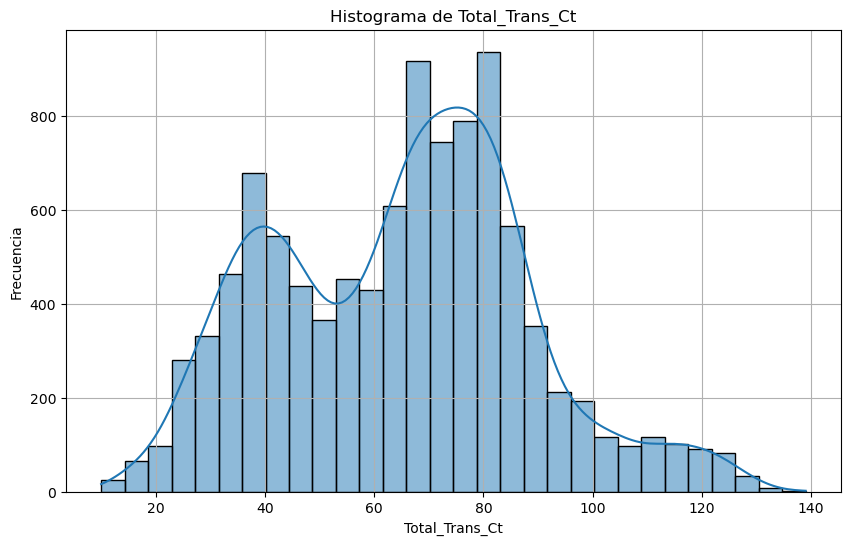

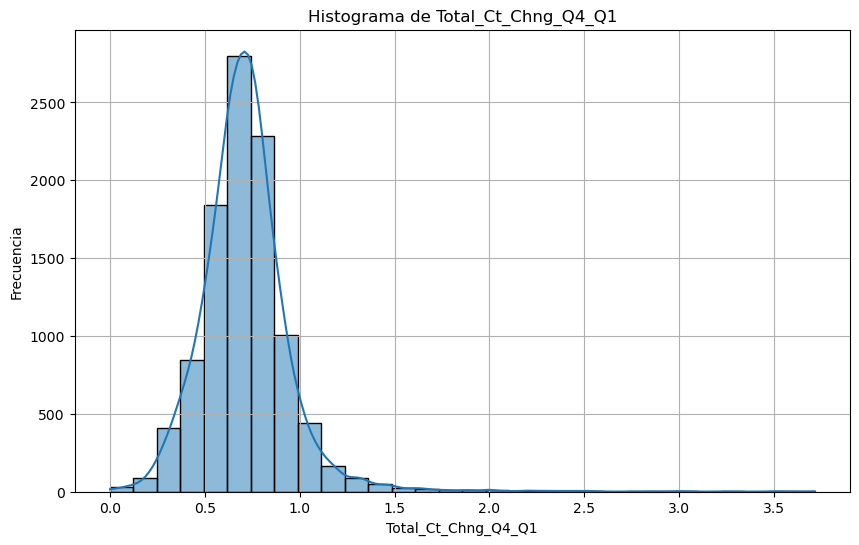

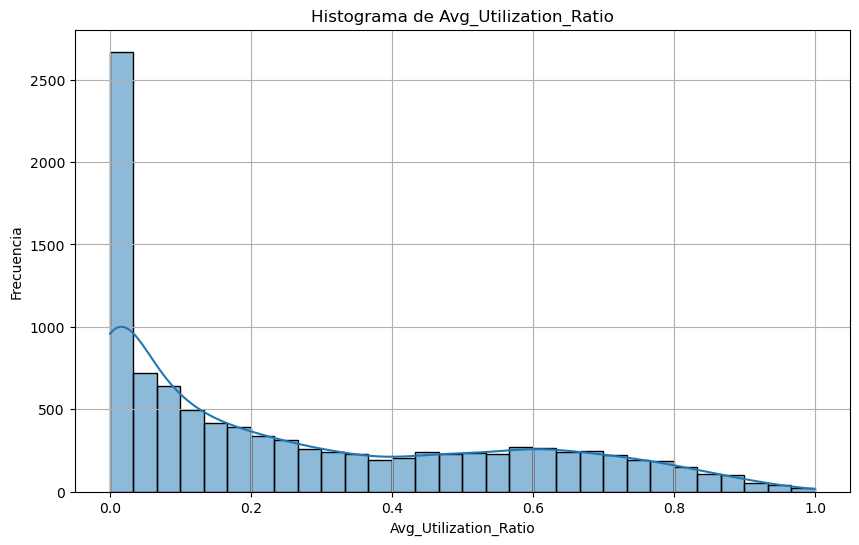

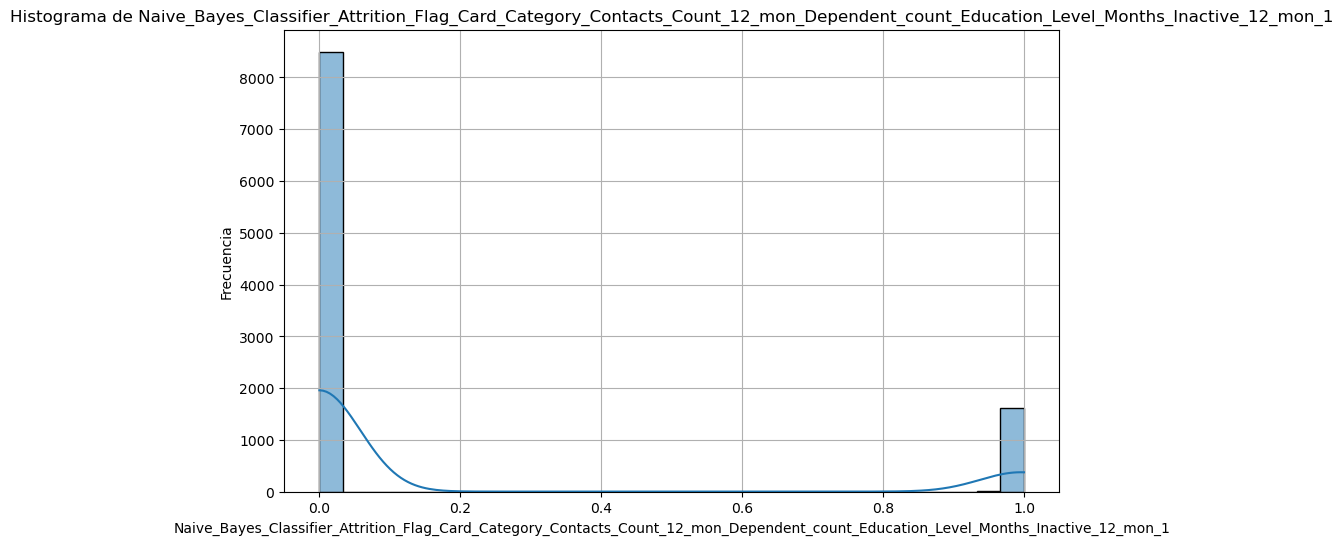

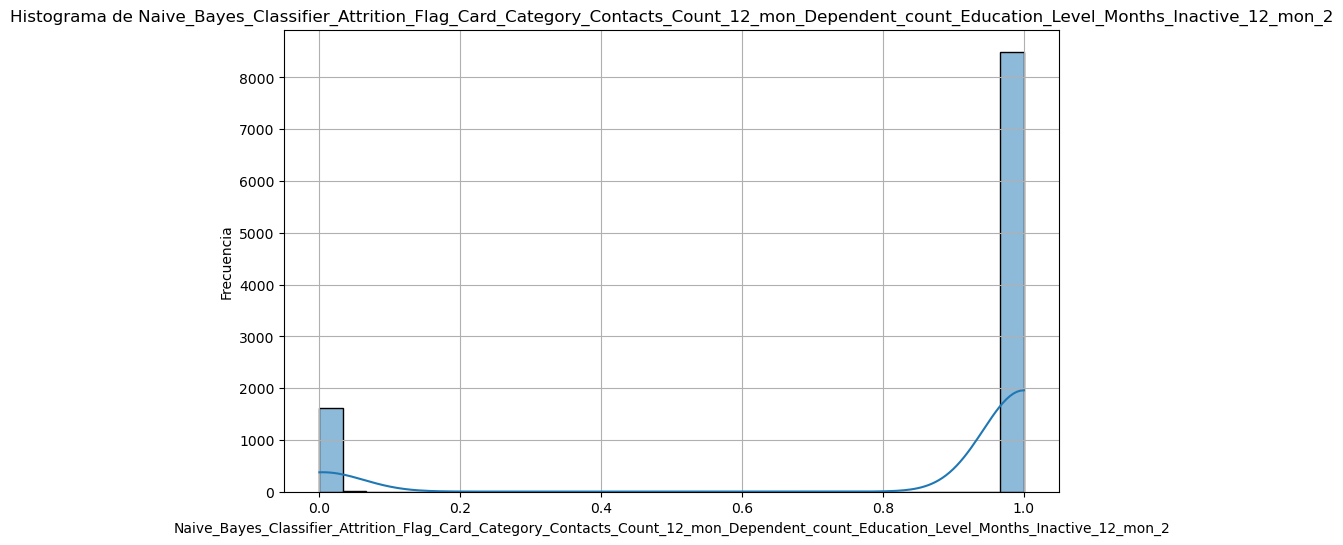

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True)  # kde=True añade una curva de densidad al histograma
    plt.title(f"Histograma de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()


Matriz de Correlación

In [4]:
import pandas as pd

correlation_matrix = data.corr()

C:\Users\halej\AppData\Local\Temp\ipykernel_3888\173076253.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


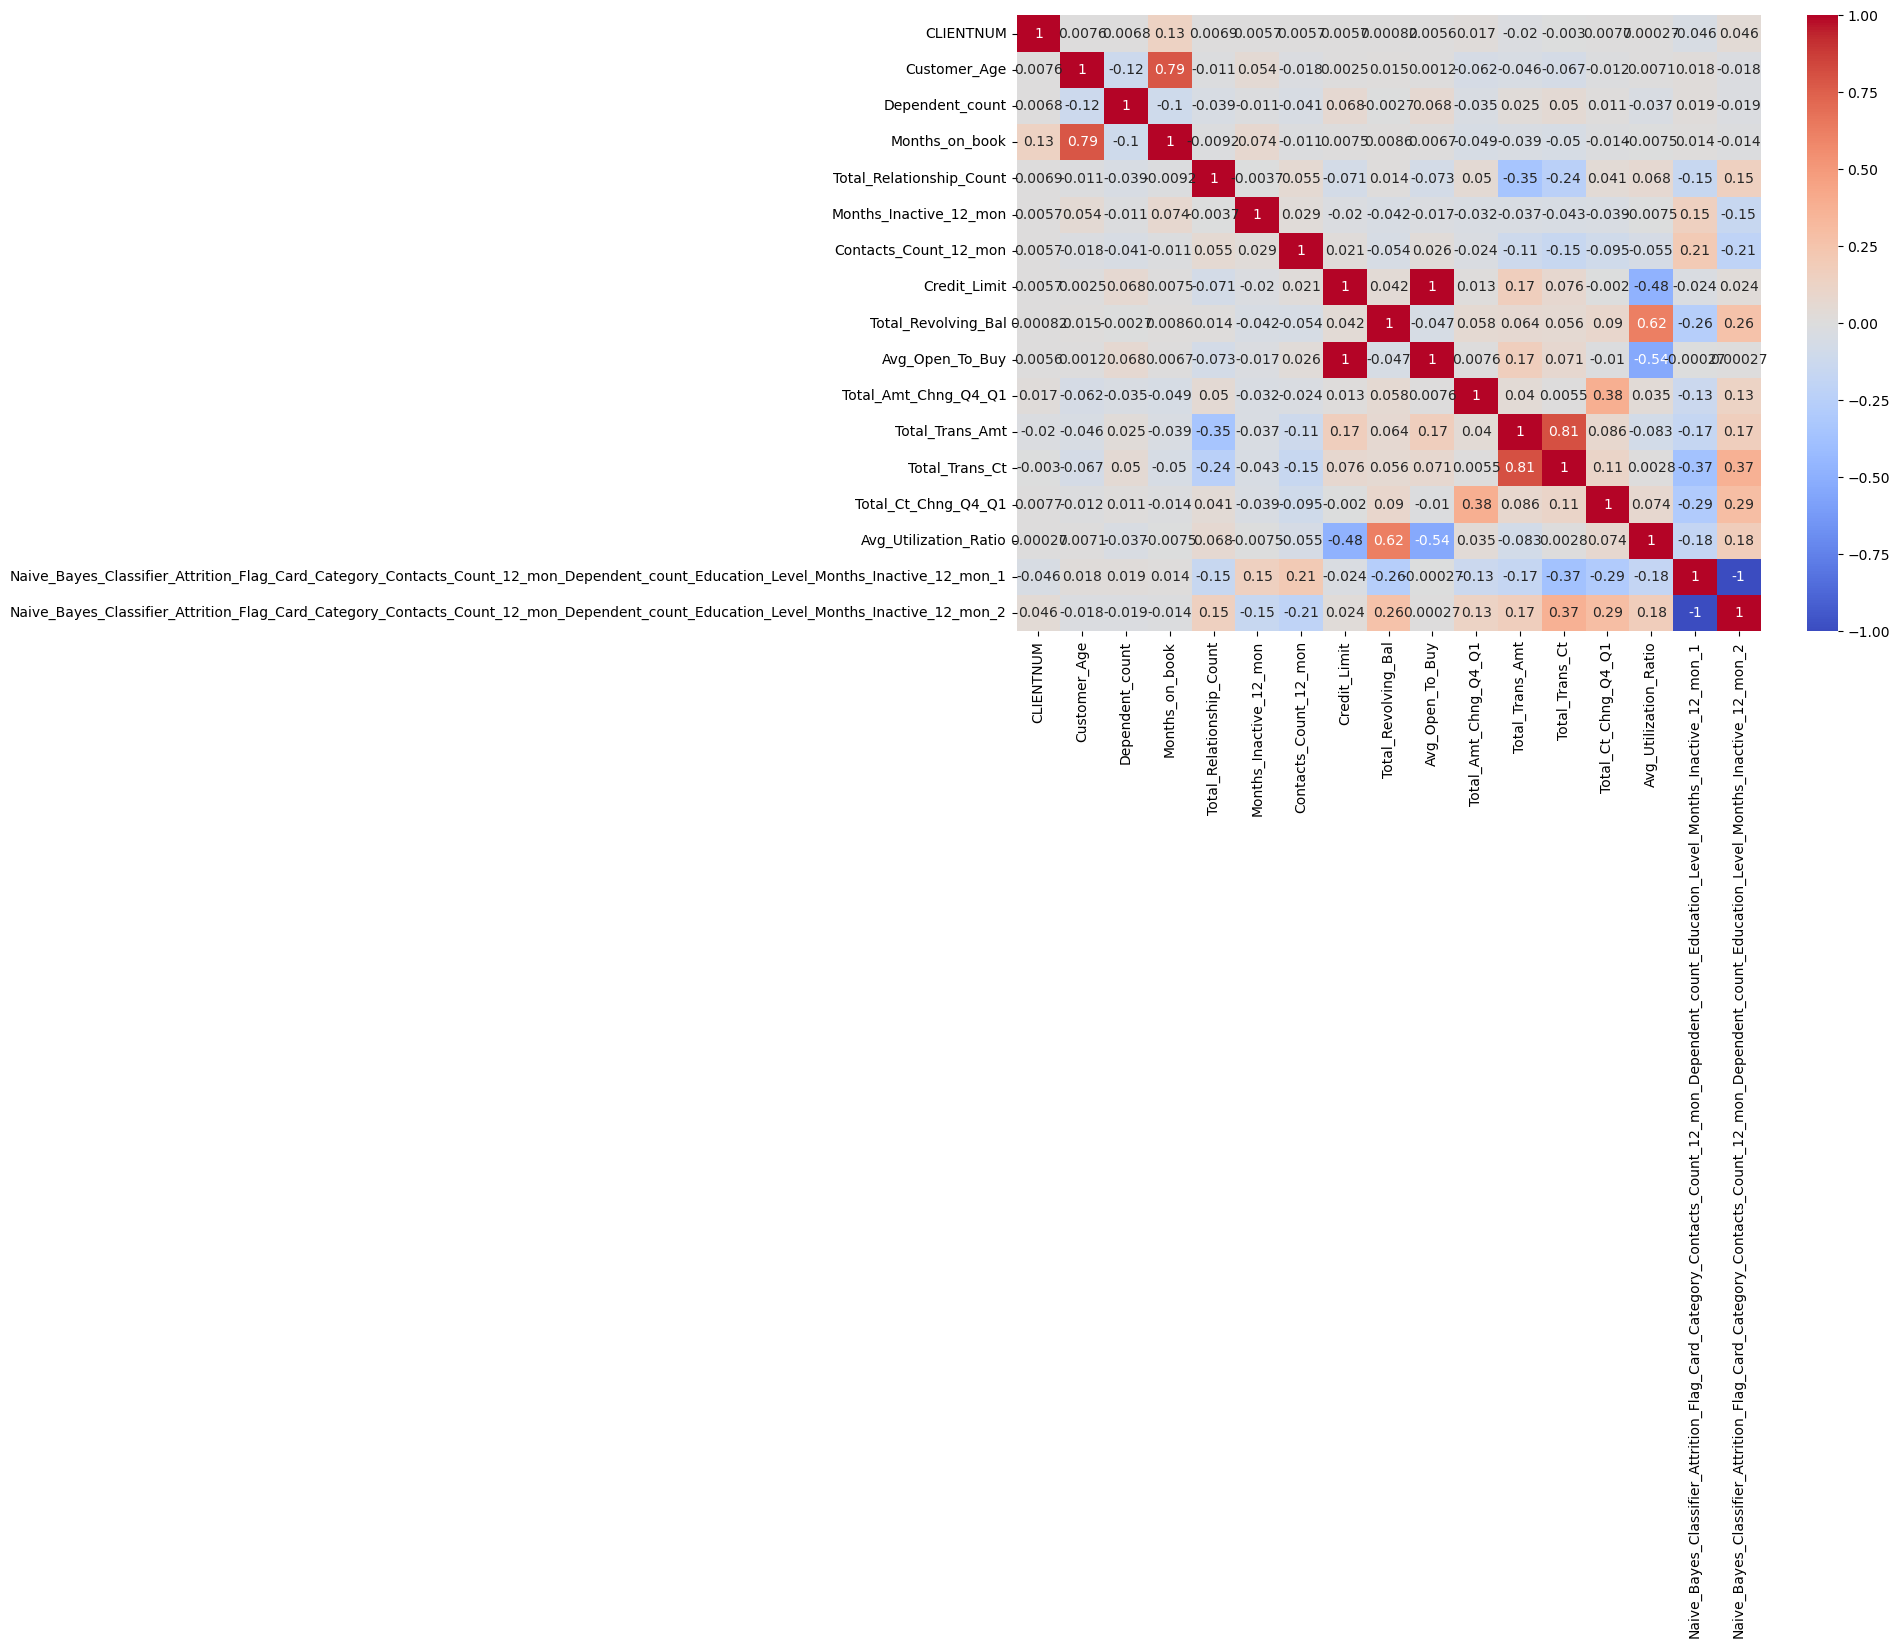

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


Selección de variables que tienen alguna correlacion que puede servir para el modelo

In [6]:
data_clean = data[['Total_Trans_Amt', 'Credit_Limit', 'Months_on_book','Total_Trans_Ct', 'Avg_Utilization_Ratio','Avg_Open_To_Buy','Customer_Age']]
data_clean

,Total_Trans_Amt,Credit_Limit,Months_on_book,Total_Trans_Ct,Avg_Utilization_Ratio,Avg_Open_To_Buy,Customer_Age
0,1144,12691.0,39,42,0.061,11914.0,45
1,1291,8256.0,44,33,0.105,7392.0,49
2,1887,3418.0,36,20,0.000,3418.0,51
3,1171,3313.0,34,20,0.760,796.0,40
4,816,4716.0,21,28,0.000,4716.0,40
...,...,...,...,...,...,...,...
10122,15476,4003.0,40,117,0.462,2152.0,50
10123,8764,4277.0,25,69,0.511,2091.0,41
10124,10291,5409.0,36,60,0.000,5409.0,44
10125,8395,5281.0,36,62,0.000,5281.0,30


In [7]:
correlation_matrix2 = data_clean.corr()

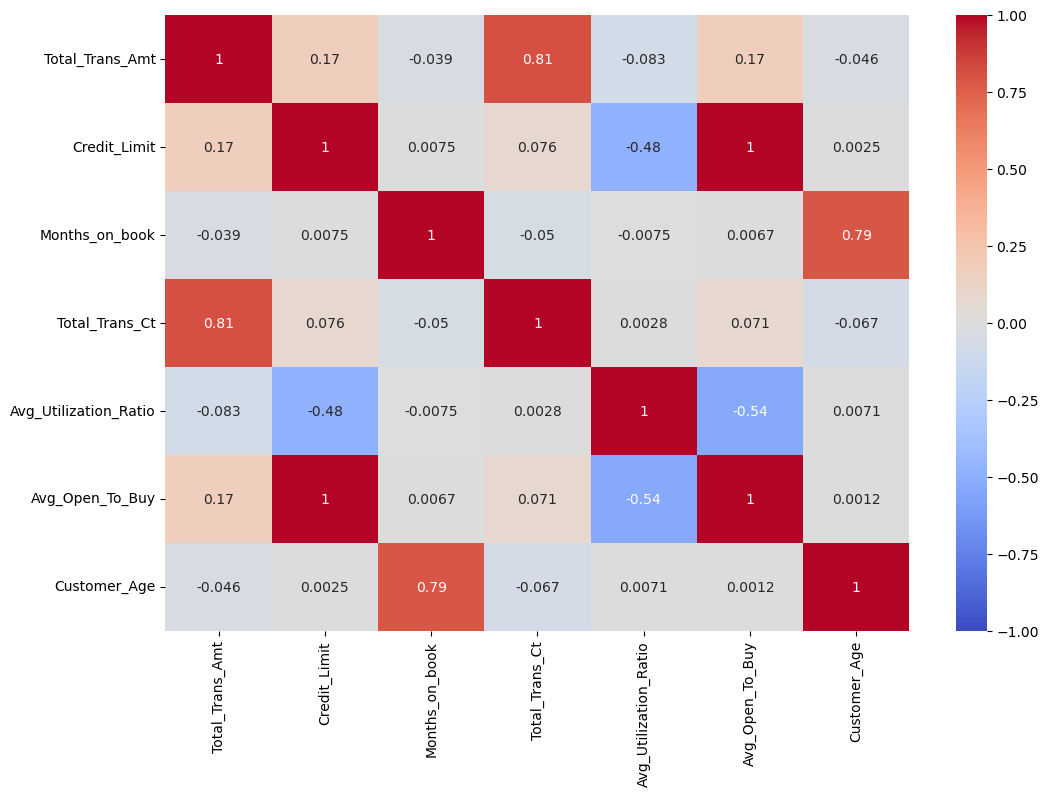

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Estandarización

In [9]:
import pandas as pd

# Función para calcular umbrales de outliers
def calculate_outliers_thresholds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return umbral_inferior, umbral_superior

# Definición de datos iniciales
columns = ['Total_Trans_Amt', 'Credit_Limit', 'Months_on_book','Total_Trans_Ct', 'Avg_Utilization_Ratio','Avg_Open_To_Buy','Customer_Age']
data_clean = data[columns]

# Agregar columnas para indicar outliers
for col in columns:
    umbral_inferior, umbral_superior = calculate_outliers_thresholds(data_clean[col])
    outlier_column_name = col + '_outliers'
    data_clean[outlier_column_name] = (data_clean[col] < umbral_inferior) | (data_clean[col] > umbral_superior)








C:\Users\halej\AppData\Local\Temp\ipykernel_3888\3546803341.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[outlier_column_name] = (data_clean[col] < umbral_inferior) | (data_clean[col] > umbral_superior)
C:\Users\halej\AppData\Local\Temp\ipykernel_3888\3546803341.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[outlier_column_name] = (data_clean[col] < umbral_inferior) | (data_clean[col] > umbral_superior)
C:\Users\halej\AppData\Local\Temp\ipykernel_3888\3546803341.py:20: Set

Generar 3 conjuntos de Datos Diferentes

In [10]:
# Crear conjuntos de datos
outliers_columns = [col + '_outliers' for col in columns]
data_outliers = data_clean[data_clean[outliers_columns].any(axis=1)]
data_without_outliers = data_clean[~data_clean[outliers_columns].any(axis=1)]

# Renombrar columnas y crear data_renamed
renamed_columns = {'original_' + col: col for col in columns}
data_renamed = data_clean.rename(columns=renamed_columns)

# Verificar los resultados
print(data_outliers.head())
print(data_without_outliers.head())
print(data_renamed.head())

    Total_Trans_Amt  Credit_Limit  Months_on_book  Total_Trans_Ct  \
6              1330       34516.0              46              31   
7              1538       29081.0              27              36   
11             1314        9095.0              54              26   
16             1671       30367.0              36              27   
18             1336        3193.0              56              30   

    Avg_Utilization_Ratio  Avg_Open_To_Buy  Customer_Age  \
6                   0.066          32252.0            51   
7                   0.048          27685.0            32   
11                  0.174           7508.0            65   
16                  0.078          28005.0            48   
18                  0.788            676.0            61   

    Total_Trans_Amt_outliers  Credit_Limit_outliers  Months_on_book_outliers  \
6                      False                   True                    False   
7                      False                   True             

Transformada BOX COX

In [11]:
import numpy as np
from scipy import stats

np.random.seed(10)

def boxcox_transform(dataframe):
    lambdas = []
    nombre = []
    df_transformed = pd.DataFrame()

    for x in dataframe.columns:
        # Evitamos transformar las columnas que indican outliers
        if '_outliers' not in x:
            df, lamb = stats.boxcox(dataframe[x] + 1e-10)  # añadimos un pequeño valor para evitar el error con ceros
            lambdas.append(lamb)
            nombre.append(x)
            df_transformed[x] = df

    df_lambdas = {
        'nombre' : nombre,
        'lambda' : lambdas
    }

    return df_transformed, pd.DataFrame(df_lambdas)

# Aplicar la transformación Box-Cox a los tres DataFrames
data_outliers_transformed, lambdas_outliers = boxcox_transform(data_outliers)
data_without_outliers_transformed, lambdas_without_outliers = boxcox_transform(data_without_outliers)
data_renamed_transformed, lambdas_renamed = boxcox_transform(data_renamed)

# Verificar los resultados
print(lambdas_outliers)
print(lambdas_without_outliers)
print(lambdas_renamed)


                  nombre    lambda
0        Total_Trans_Amt  0.298151
1           Credit_Limit  0.537778
2         Months_on_book  1.107240
3         Total_Trans_Ct  0.999848
4  Avg_Utilization_Ratio  0.164113
5        Avg_Open_To_Buy  0.529639
6           Customer_Age  0.985433
                  nombre    lambda
0        Total_Trans_Amt  0.449166
1           Credit_Limit -0.327391
2         Months_on_book  1.064727
3         Total_Trans_Ct  1.224070
4  Avg_Utilization_Ratio  0.146909
5        Avg_Open_To_Buy  0.065261
6           Customer_Age  1.016947
                  nombre    lambda
0        Total_Trans_Amt -0.137500
1           Credit_Limit -0.287455
2         Months_on_book  1.157383
3         Total_Trans_Ct  0.754418
4  Avg_Utilization_Ratio  0.148129
5        Avg_Open_To_Buy  0.032869
6           Customer_Age  1.032608


Aplicación de K-Medias

In [17]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def optimal_clusters(data):
    inercias = []
    for k in range(1, 60):
        kmeans = KMeans(n_clusters=k, random_state=5)
        kmeans.fit(data)
        inercias.append(kmeans.inertia_)
    
    # Calculamos la derivada de los cambios de inercia para encontrar el "codo"
    diff = np.diff(inercias)
    diff2 = np.diff(diff)
    k_opt = diff2.argmax() + 2  # se suma 2 porque diff2 tiene long - 2 
    return k_opt, inercias

def clusterize_data(data):
    optimal_k, inercias = optimal_clusters(data)
    kmeans = KMeans(n_clusters=optimal_k, random_state=10)
    clusters = kmeans.fit_predict(data)
    return clusters, optimal_k, inercias

# Aplicar clustering a los datasets
data_outliers_transformed['cluster'], k_opt_outliers, inercias_outliers = clusterize_data(data_outliers_transformed)
data_without_outliers_transformed['cluster'], k_opt_without, inercias_without = clusterize_data(data_without_outliers_transformed)
data_renamed_transformed['cluster'], k_opt_renamed, inercias_renamed = clusterize_data(data_renamed_transformed)

# Mostrar resultados
print(f"Optimal clusters for data_outliers_transformed: {k_opt_outliers}")
print(f"Optimal clusters for data_without_outliers_transformed: {k_opt_without}")
print(f"Optimal clusters for data_renamed_transformed: {k_opt_renamed}")

print(data_outliers_transformed.head())
print(data_without_outliers_transformed.head())
print(data_renamed_transformed.head())


c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

Optimal clusters for data_outliers_transformed: 2
Optimal clusters for data_without_outliers_transformed: 2
Optimal clusters for data_renamed_transformed: 2
   Total_Trans_Amt  Credit_Limit  Months_on_book  Total_Trans_Ct  \
0        25.283982    510.818826       61.733790       29.988401   
1        26.551916    465.690739       33.820209       34.985738   
2        25.180827    248.379112       73.902470       24.990941   
3        27.300662    476.698419       46.845260       25.990444   
4        25.322440    140.661333       76.976193       28.988919   

   Avg_Utilization_Ratio  Avg_Open_To_Buy  Customer_Age  cluster  
0              -2.192786       459.351157     47.858228        0  
1              -2.391404       423.519066     29.859546        0  
2              -1.520151       211.243506     61.054646        1  
3              -2.084369       426.116320     45.023984        0  
4              -0.233659        57.660240     57.288906        1  
   Total_Trans_Amt  Credit_Limit

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



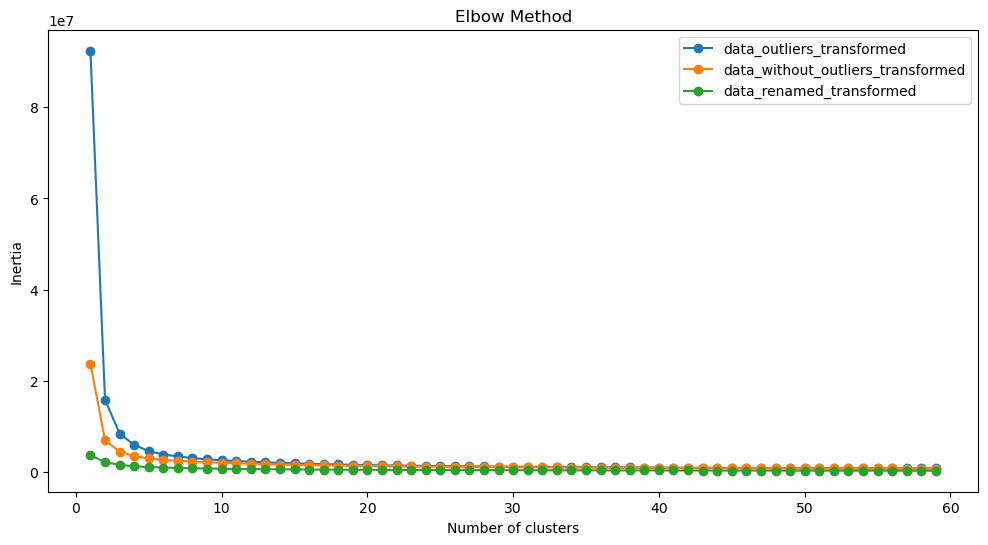

In [18]:
# Graficar inercias
plt.figure(figsize=(12, 6))

plt.plot(range(1, 60), inercias_outliers, '-o', label="data_outliers_transformed")
plt.plot(range(1, 60), inercias_without, '-o', label="data_without_outliers_transformed")
plt.plot(range(1, 60), inercias_renamed, '-o', label="data_renamed_transformed")

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()


Graficación con los CLUSTERS

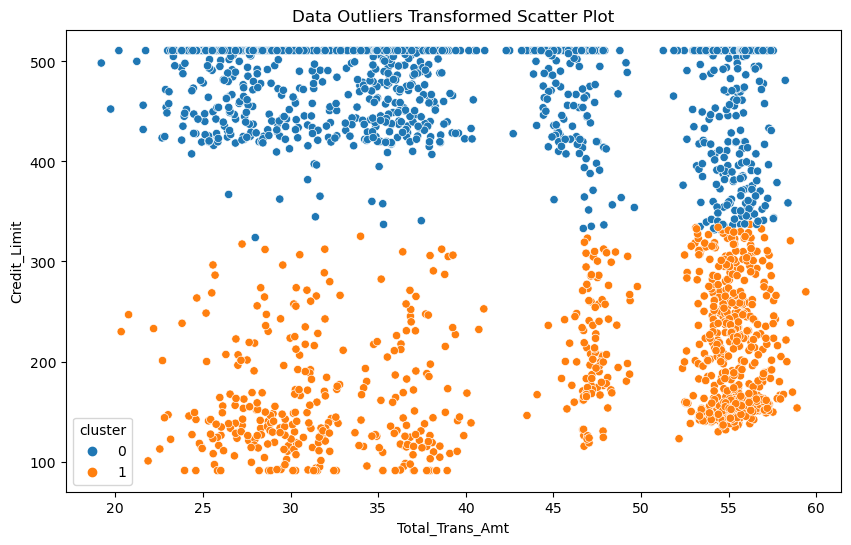

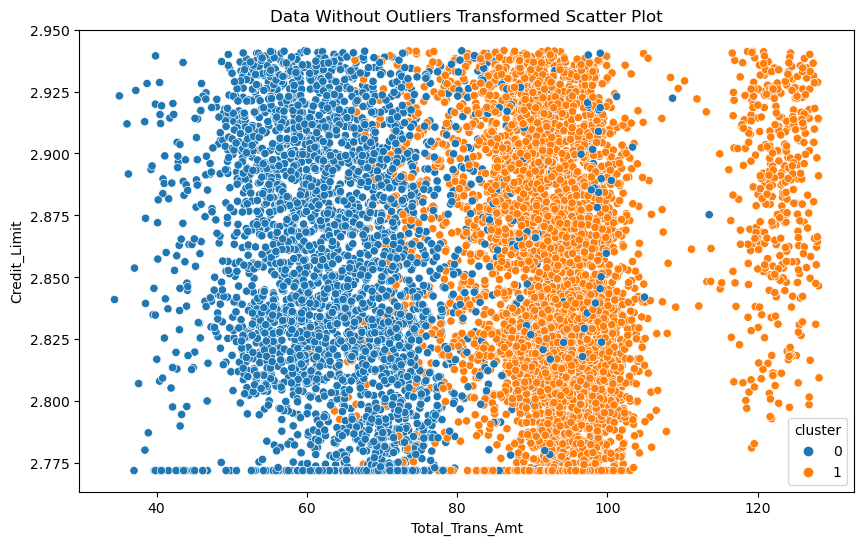

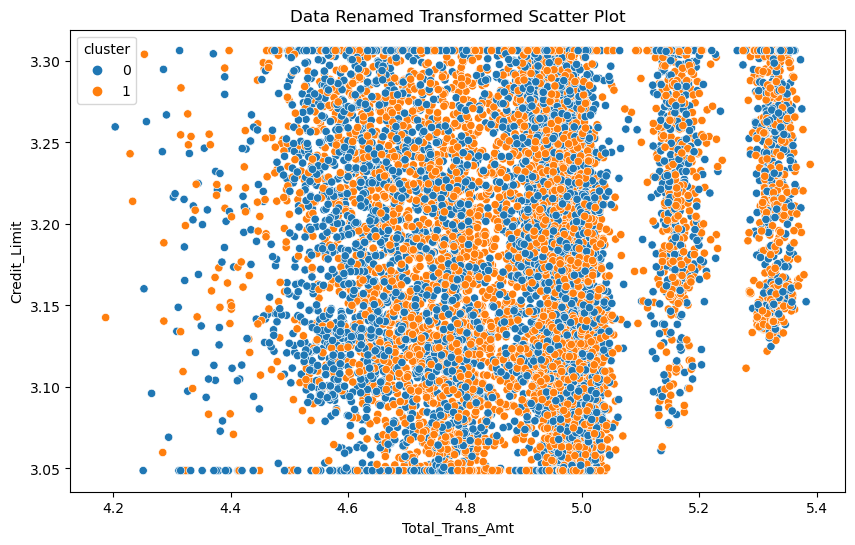

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_transformed(df_transformed, title):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_transformed, x='Total_Trans_Amt', y='Credit_Limit', hue='cluster')
    plt.title(title)
    plt.show()

# Dibujar scatter plots de los DataFrames transformados
if 'Total_Trans_Amt' in data_outliers_transformed.columns and 'Credit_Limit' in data_outliers_transformed.columns:
    plot_scatter_transformed(data_outliers_transformed, "Data Outliers Transformed Scatter Plot")

if 'Total_Trans_Amt' in data_without_outliers_transformed.columns and 'Credit_Limit' in data_without_outliers_transformed.columns:
    plot_scatter_transformed(data_without_outliers_transformed, "Data Without Outliers Transformed Scatter Plot")

if 'Total_Trans_Amt' in data_renamed_transformed.columns and 'Credit_Limit' in data_renamed_transformed.columns:
    plot_scatter_transformed(data_renamed_transformed, "Data Renamed Transformed Scatter Plot")



In [14]:
!pip install plotly pandas


Defaulting to user installation because normal site-packages is not writeable


Grafico 3d

In [15]:
import plotly.express as px

# Función para graficar
def plot_3d_scatter_transformed(df, title):
    if all(col in data_outliers_transformed for col in ['Total_Trans_Amt', 'Credit_Limit', 'Avg_Open_To_Buy', 'cluster']):
        fig = px.scatter_3d(df, 
                            x='Total_Trans_Amt', 
                            y='Credit_Limit', 
                            z='Avg_Open_To_Buy',
                            color='cluster')
        fig.update_layout(title=title)
        fig.show()
    else:
        print(f"Columnas faltantes en {title}")


plot_3d_scatter_transformed(data_outliers_transformed, "Data Outliers Transformed 3D Scatter Plot")


In [20]:
import plotly.express as px

# Función para graficar
def plot_3d_scatter_transformed(df, title):
    if all(col in data_without_outliers_transformed for col in ['Total_Trans_Amt', 'Credit_Limit', 'Avg_Open_To_Buy', 'cluster']):
        fig = px.scatter_3d(df, 
                            x='Total_Trans_Amt', 
                            y='Credit_Limit', 
                            z='Avg_Open_To_Buy',
                            color='cluster')
        fig.update_layout(title=title)
        fig.show()
    else:
        print(f"Columnas faltantes en {title}")

plot_3d_scatter_transformed(data_without_outliers_transformed, "Data Whith Out Outliers Transformed 3D Scatter Plot")